### Import packages


In [1]:
# Some standard python packages
import os
import datetime
import sunpy.map
import matplotlib.pyplot as plt

Tell python where your local copy of *chmap* is located

In [2]:
import sys
sys.path.append("/Users/turtle/GitReps/CHMAP")

Import *chmap* functions

In [3]:
import chmap.database.db_classes as db_class
import chmap.database.db_funs as db_funcs
import chmap.utilities.datatypes.datatypes as psi_dtypes
import chmap.utilities.plotting.psi_plotting as psi_plots

### Initialize Database Connection
The paths used below assume that we want to connect to a local version of the SQLite example-database and filesystem ([download](http://www.predsci.com/chmap/example_db/CHMAP_DB_example.zip), ~6GB). 
In the paths below, the example filesystem is located at '/Volumes/extdata2/CHMAP_DB_example'.  However, the same commands can be used to connect to the remote MySQL database.

#### Database type and credentials
Example code below is for a local SQLite connection, but includes all fields required for a remote MySQL connection.

In [4]:
# Designate database-type and credentials
db_type = "sqlite"       # 'sqlite'  Use local SQLite file-based db
                        # 'mysql' Use a remote MySQL database

user = "turtle"         # only needed for remote databases.
password = ""           # See example109 for setting-up an encrypted password.  In
                        # this case leave password="", and init_db_conn() will
                        # automatically find and use your saved password. Otherwise,
                        # enter your MySQL password here.
# If password=="", then be sure to specify the directory where encrypted credentials
# are stored.  Setting cred_dir=None will cause the code to attempt to automatically
# determine a path to the settings/ directory.
cred_dir = "/Users/turtle/GitReps/CHMAP/chmap/settings"

#### Paths and database name

In [5]:
# Database paths
map_data_dir = "/Volumes/extdata2/CHMAP_DB_example/maps"
hdf_data_dir = "/Volumes/extdata2/CHMAP_DB_example/processed_images"
raw_data_dir = "/Volumes/extdata2/CHMAP_DB_example/raw_images"
# Specify the database location. In the case of MySQL, this will be an IP address or
# remote host name. For SQLite, this will be the full path to a database file.
    # mysql
# db_loc = "q.predsci.com"
    # sqlite
db_loc = "/Volumes/extdata2/CHMAP_DB_example/chmap_example.db"
# specify which database to connect to (unnecessary for SQLite)
mysql_db_name = "chd"

Start python SQLAlchemy session/connection to database

In [6]:
# Establish connection to database
db_session = db_funcs.init_db_conn(db_type, db_class.Base, db_loc, db_name=mysql_db_name,
                                   user=user, password=password, cred_dir=cred_dir)

Attempting to connect to SQLite DB server /Volumes/extdata2/CHMAP_DB_example/chmap_example.db
Connection successful



### Sample image query
Query all EUV images/wavelengths in the specified time range.

In [7]:
# set time range
query_time_min = datetime.datetime(2011, 2, 1, 0, 0, 0)
query_time_max = datetime.datetime(2011, 2, 1, 7, 0, 0)


In [8]:
# query database for images
image_pd = db_funcs.query_euv_images(db_session, time_min=query_time_min,
                                     time_max=query_time_max)
image_pd.keys()

Index(['data_id', 'date_obs', 'instrument', 'wavelength', 'distance', 'cr_lon',
       'cr_lat', 'cr_rot', 'flag', 'time_of_download', 'fname_raw',
       'fname_hdf'],
      dtype='object')

View query results, including relative paths to the raw and deconvolved files

In [9]:
# view select columns from the results
image_pd.loc[:, ['date_obs', 'instrument', 'fname_raw', 'fname_hdf']]

,date_obs,instrument,fname_raw,fname_hdf
0,2011-02-01 02:00:32,AIA,2011/02/01/aia_lev1_euv_12s_20110201T020032_19...,2011/02/01/aia_lvl2_20110201T020031_193.h5
1,2011-02-01 04:00:32,AIA,2011/02/01/aia_lev1_euv_12s_20110201T040032_19...,2011/02/01/aia_lvl2_20110201T040031_193.h5
2,2011-02-01 06:00:32,AIA,2011/02/01/aia_lev1_euv_12s_20110201T060032_19...,2011/02/01/aia_lvl2_20110201T060031_193.h5
3,2011-02-01 02:00:30,EUVI-A,2011/02/01/sta_euvi_20110201T020030_195.fits,2011/02/01/euvia_lvl2_20110201T020030_195.h5
4,2011-02-01 04:00:30,EUVI-A,2011/02/01/sta_euvi_20110201T040030_195.fits,2011/02/01/euvia_lvl2_20110201T040030_195.h5
5,2011-02-01 06:00:30,EUVI-A,2011/02/01/sta_euvi_20110201T060030_195.fits,2011/02/01/euvia_lvl2_20110201T060030_195.h5
6,2011-02-01 02:01:08,EUVI-B,2011/02/01/stb_euvi_20110201T020107_195.fits,2011/02/01/euvib_lvl2_20110201T020107_195.h5
7,2011-02-01 04:01:08,EUVI-B,2011/02/01/stb_euvi_20110201T040107_195.fits,2011/02/01/euvib_lvl2_20110201T040107_195.h5
8,2011-02-01 06:01:08,EUVI-B,2011/02/01/stb_euvi_20110201T060107_195.fits,2011/02/01/euvib_lvl2_20110201T060107_195.h5


### Plot the raw .fits image

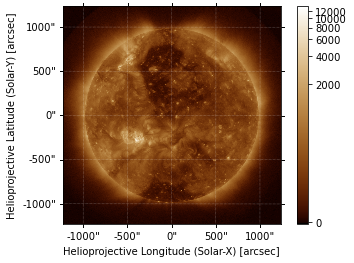

In [10]:
plot_image_num = 0
fits_infile_aia = os.path.join(raw_data_dir, image_pd.fname_raw[plot_image_num])

# Load images image using the built-in methods of SunPy
# This creates a sunpy "map" structure which is a nice way to handle metadata
map_aia = sunpy.map.Map(fits_infile_aia)  # AIA is the EUV telescope on SDO

# now save a plot using the sunpy plot example
map_aia.plot()
# map_aia.draw_limb()
plt.colorbar()
plt.show()

### Plot the deconvolved image (hdf .h5 file)

In [11]:
# open the first image as an 'LosImage' 
image_path = os.path.join(hdf_data_dir, image_pd.fname_hdf[plot_image_num])
psi_image = psi_dtypes.read_euv_image(image_path)
type(psi_image)

chmap.utilities.datatypes.datatypes.LosImage

Pre-processing images are deconvolved, but also rotated and/or re-centered as needed.

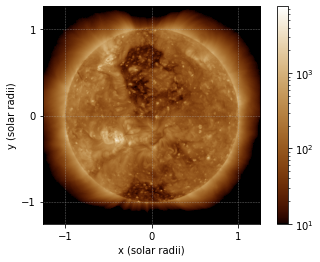

In [12]:
# plot deconvolved image
psi_plots.PlotImage(psi_image)
plt.colorbar()
plt.show()

#### Wrap-up

In [13]:
# Close connection to database
db_session.close()